# Validation

Here we tested accuracy, True Positive Rate (TPR) and True Negative Rate (TNR). The test is done on a small dataset. 

In [1]:
from tools import plot_roc, plot_pdf

import matplotlib.pyplot as plt
import numpy as np
import csv

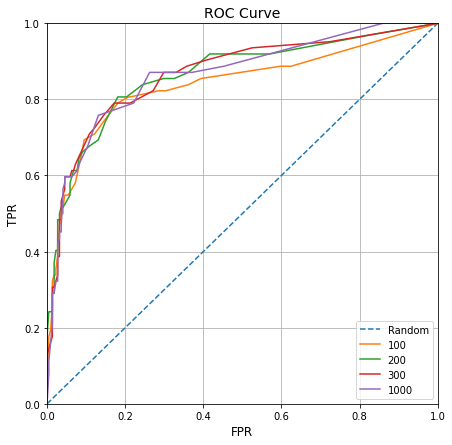

In [2]:
original_labels = {}
rates = {}

wl, bl = [], []
wl2, bl2 = [], []
wl3, bl3 = [], []
wl4, bl4 = [], []

with open("data/data-zealot.csv") as csvfile: 
    reader = csv.reader(csvfile)
    for row in reader:
        original_labels[row[0]] = int(float(row[1]))
        
with open("data/graph-small-validation.csv") as csvfile: 
    reader = csv.reader(csvfile)
    for row in reader:
        if row[1] in original_labels:
            rates[row[1]] = float(row[3])
            
            if original_labels[row[1]] == 1:
                wl.append(float(row[3]))
            else:
                bl.append(float(row[3]))
                
with open("data/graph-small-validation2.csv") as csvfile: 
    reader = csv.reader(csvfile)
    for row in reader:
        if row[1] in original_labels:
            rates[row[1]] = float(row[3])
            
            if original_labels[row[1]] == 1:
                wl2.append(float(row[3]))
            else:
                bl2.append(float(row[3]))

with open("data/graph-small-validation3.csv") as csvfile: 
    reader = csv.reader(csvfile)
    for row in reader:
        if row[1] in original_labels:
            rates[row[1]] = float(row[3])
            
            if original_labels[row[1]] == 1:
                wl3.append(float(row[3]))
            else:
                bl3.append(float(row[3]))

with open("data/graph-small-validation4.csv") as csvfile: 
    reader = csv.reader(csvfile)
    for row in reader:
        if row[1] in original_labels:
            rates[row[1]] = float(row[3])
            
            if original_labels[row[1]] == 1:
                wl4.append(float(row[3]))
            else:
                bl4.append(float(row[3]))
        
                         
l = 50 

hist_wl, bins = np.histogram(wl, bins=np.linspace(0, 1, l + 1), density=True)
hist_bl, bins = np.histogram(bl, bins=np.linspace(0, 1, l + 1), density=True)

hist_wl2, bins = np.histogram(wl2, bins=np.linspace(0, 1, l + 1), density=True)
hist_bl2, bins = np.histogram(bl2, bins=np.linspace(0, 1, l + 1), density=True)

hist_wl3, bins = np.histogram(wl3, bins=np.linspace(0, 1, l + 1), density=True)
hist_bl3, bins = np.histogram(bl3, bins=np.linspace(0, 1, l + 1), density=True)

hist_wl4, bins = np.histogram(wl4, bins=np.linspace(0, 1, l + 1), density=True)
hist_bl4, bins = np.histogram(bl4, bins=np.linspace(0, 1, l + 1), density=True)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(np.arange(0, l), np.arange(0, l), "--")
ax.set_xlim([-0, 1])
ax.set_ylim([-0, 1])
ax.set_title("ROC Curve", fontsize=14)
ax.set_ylabel("TPR", fontsize=12)
ax.set_xlabel("FPR", fontsize=12)
ax.grid()

plot_roc(hist_bl, hist_wl, ax, np.arange(0, l), False)
plot_roc(hist_bl2, hist_wl2, ax, np.arange(0, l), False)
plot_roc(hist_bl3, hist_wl3, ax, np.arange(0, l), False)
plot_roc(hist_bl4, hist_wl4, ax, np.arange(0, l), False)

ax.legend(["Random", "100", "200", "300", "1000"])
plt.show()

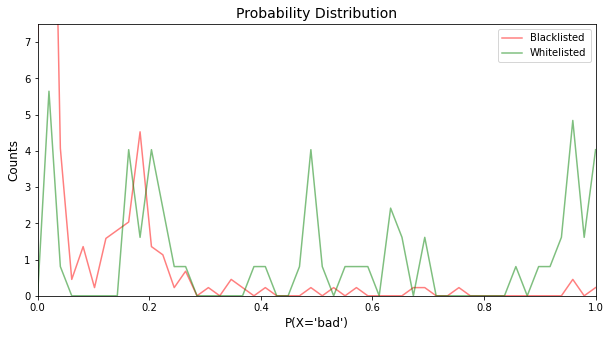

In [3]:
x = np.linspace(0, 1, num=l)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_pdf(hist_bl4, hist_wl4, ax, x)
plt.show()

In [4]:
n = len(bl4) + len(wl4)
print("Confusion matrix, relative numbers") 
print([round(sum(np.array(wl4) > 0.5) / len(wl4), 3), round(sum(np.array(wl4) < 0.5)/len(wl4), 3)])
print([round(sum(np.array(bl4) > 0.5)/len(bl4), 3), round(sum(np.array(bl4) < 0.5)/len(bl4), 3)])
print(f"Accuracy: {round((sum(np.array(wl4) > 0.5) + sum(np.array(bl4) < 0.5)) / n, 3)}")

Confusion matrix, relative numbers
[0.468, 0.532]
[0.036, 0.964]
Accuracy: 0.855


### Sources:
[1] Receiver Operating Characteristic Curves Demystified (in Python), https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0